<a href="https://colab.research.google.com/github/trentivan/My-Resume/blob/main/Actividad_6_Asignaci%C3%B3n_de_tiempo_con_optimizaci%C3%B3n_de_enjambre_de_part%C3%ADculas_(PSO_time_allocation_problem).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Bioinspired Artificial Intelligence Algorithm - PSO - time allocation


Libraries and hyperparameters

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

w = 0.8
c1 = 0.5
c2 = 0.5

Function particle

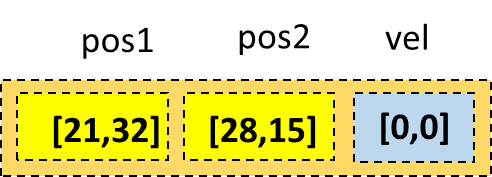

In [ ]:
def particle():
  while True:
    particle = []
    pos1 = []
    pos2 = []
    for i in range(6):
      rand = random.randint(0,3) + random.random()
      rand2 = random.randint(0,3) + random.random()
      pos1.append(rand)
      pos2.append(rand2)
    vel = [0,0,0,0,0,0]
    particle.append(pos1)
    particle.append(pos2)
    particle.append(vel)
    if sum(particle[0]) <= 13 and sum(particle[1]) <= 13:
      return particle
      break


In [ ]:
x = particle()

print(x[0])
print(x[1])
print(x[2])



[1.0372196790529302, 2.4672377233163756, 3.794125333949, 1.1382570078362615, 1.2197099174080128, 1.2071082402953652]
[0.3771184029357165, 1.5573045030990689, 3.8085799549913073, 2.4512651572832906, 2.020043899893313, 2.4643472088561094]
[0, 0, 0, 0, 0, 0]


Population of particles

In [ ]:
def population(quant):
  particles = []
  for i in range(quant):
    particles.append(particle())
  return particles


In [ ]:
pop = population(20)

print(pop[0])
print(pop[2])
print(len(pop))


[[2.8378427677313383, 1.9121047776909976, 3.07521659111688, 3.0005028902485487, 0.45862084507141243, 0.14720353172581024], [1.5597341987095636, 2.6090346095607355, 2.4403786767253193, 2.684171042607509, 1.3189682008769337, 1.662640262565097], [0, 0, 0, 0, 0, 0]]
[[0.9893954206075478, 1.5069940750759492, 0.852447587678724, 0.7371694341413708, 3.868347190686447, 2.0485771727605995], [0.8105567479236702, 3.4065433217040244, 1.2195928597237087, 0.9962937515560507, 0.3705294423542391, 1.752316874812846], [0, 0, 0, 0, 0, 0]]
20


Fitness function

In [ ]:
def evaluate(particle,indice):
  class1 = [3,2,1,2,4,2.5]
  class2 = [1,4,0,2,4,1.5]
  class3 = [1.5,2.5,1,2,3.5,1.5]
  classes = [class1,class2,class3]
  if sum(particle[indice]) <= 13:
    summ = 0
    for classs in classes:
      count = 0
      while count < len(particle[indice]):
        double = [particle[indice][count],classs[count]]
        minimum = min(double)
        summ += minimum
        count += 1
    return summ/39
  else:
    return 0.01



In [ ]:
p = particle()

print(p[0])
print(evaluate(p,0))
print()
print(p[1])
print(evaluate(p,1))



[0.58870770921867, 0.25677108523413017, 3.083841706404815, 0.3447909662376806, 2.624884175855088, 1.1376960359826993]
0.43227051070730266

[0.7098797252960549, 2.068695846889451, 1.414582044806524, 2.0818624757124446, 0.5240541306717394, 3.1692175622925705]
0.5984408528636483


Personal best - pbest

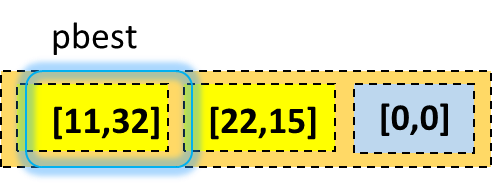

In [ ]:
def pbest(particle):
  values = []
  count = 0
  while count < 2:
    if count == 0:
      best = particle[0]
    elif count == 1:
      if evaluate(particle,count) > evaluate(particle,0):
        best = particle [1]
    count += 1
  return best


In [ ]:
p = particle()

print(p[0])
print(p[1])
print(pbest(p))
print()
print(evaluate(p,0))
print(evaluate(p,1))



[3.954170420938411, 0.9473093806691285, 2.5755546944056125, 0.483264622211492, 1.070445150224619, 0.6358887357480177]
[1.1758007669336104, 2.560544498975637, 0.8593842778757149, 2.7965337096856806, 3.6553763358677616, 1.158722269205612]
[1.1758007669336104, 2.560544498975637, 0.8593842778757149, 2.7965337096856806, 3.6553763358677616, 1.158722269205612]

0.43360829914255833
0.8312265145627344


Global best - gbest

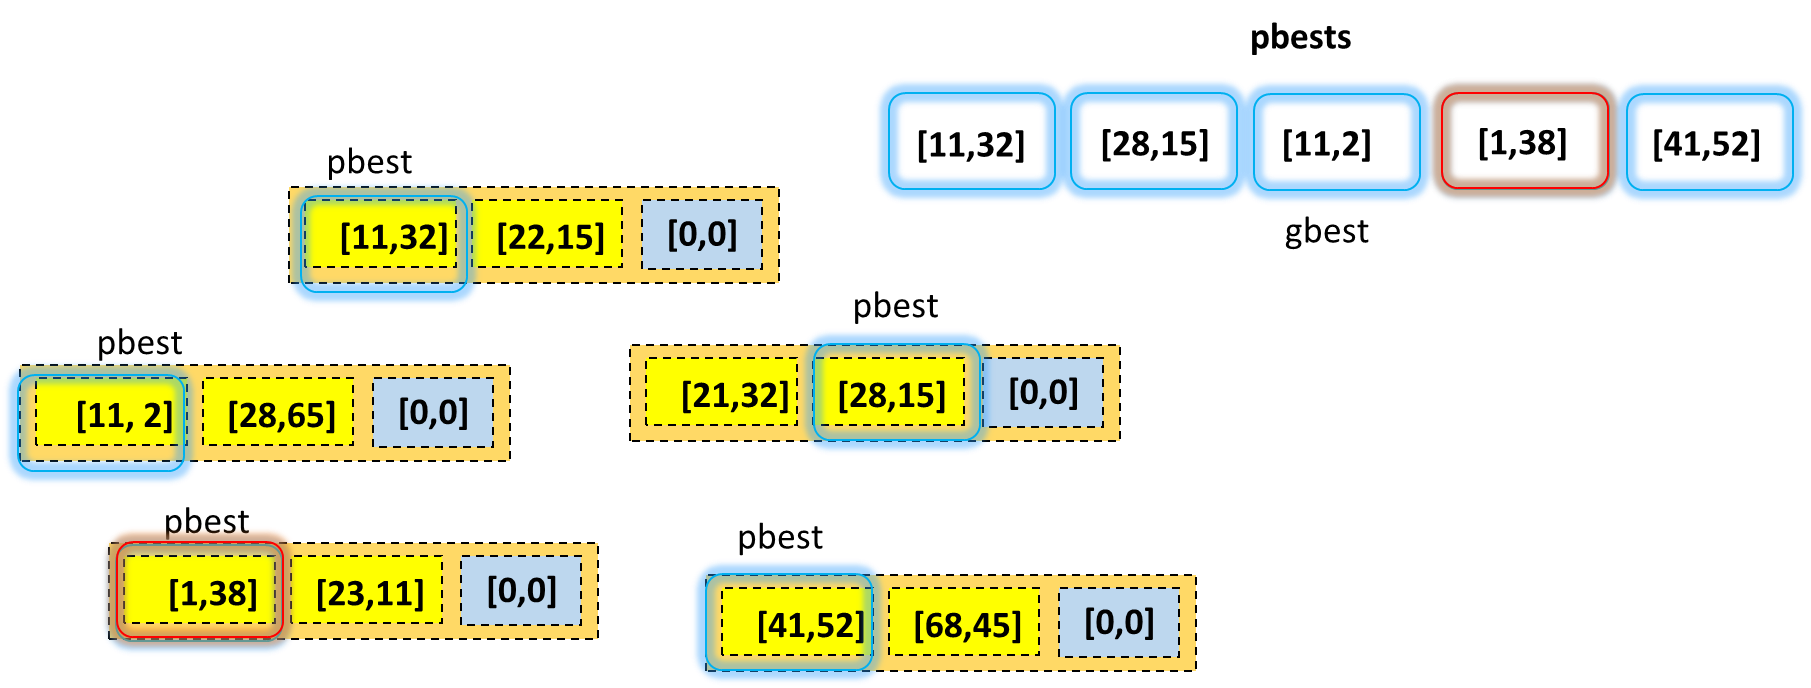

In [ ]:
def evaluate_simple(part):
  class1 = [3,2,1,2,4,2.5]
  class2 = [1,4,0,2,4,1.5]
  class3 = [1.5,2.5,1,2,3.5,1.5]
  classes = [class1,class2,class3]
  if sum(part) <= 13:
    summ = 0
    for classs in classes:
      count = 0
      while count < len(part):
        double = [part[count],classs[count]]
        minimum = min(double)
        summ += minimum
        count += 1
    return summ/39
  else:
    return 0.01

def gbest(population_generated):
  pbests = []
  for i in population_generated:
    pbests.append(list(pbest(i)))

  for indice in pbests:
    if pbests.index(indice) == 0:
      gbest = pbests[0]
    else:
      if evaluate_simple(indice) > evaluate_simple(gbest):
        gbest = indice

  return gbest



In [ ]:
pop = population(20)
best = gbest(pop)
print(best)
print(evaluate_simple(best))


[3.0352816121672634, 2.7409555685235825, 1.3988630411152585, 1.2042679029116683, 2.383455096652296, 2.187381259110023]
0.7869616878544998


Update of particle velocity

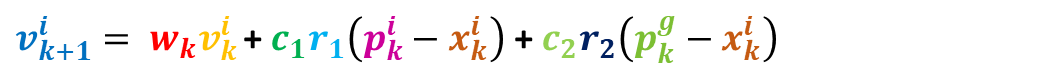

In [ ]:
def new_velocity(part,pop):
  r1 = random.random()
  r2 = random.random()
  vel = part[2]
  new_v = w*np.array(vel) + c1*r1*(np.array(pbest(part))-np.array(part[1])) + c2*r2*(np.array(gbest(pop))-np.array(part[1]))
  return new_v


In [ ]:
pop = population(20)
p = pop[0]
vel = p[2]
new_vel = new_velocity(p,pop)
print(p)
print(vel)
print(new_vel)





[[1.6982762840702486, 0.3425655787495473, 1.0566150839386281, 2.7136483377874274, 0.39365706487136864, 3.073578854050639], [2.389385167990886, 3.7588402234778973, 2.4855109059233556, 0.5662553903868132, 0.24086319869142736, 2.778646412413629], [0, 0, 0, 0, 0, 0]]
[0, 0, 0, 0, 0, 0]
[-0.57851087 -0.5481646  -0.23370515  1.37689358  0.98618524 -0.73057077]


New position and new particle

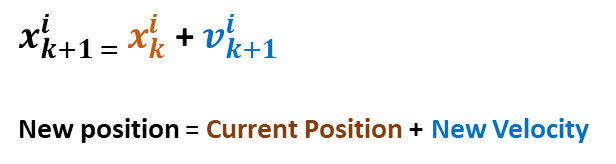

In [ ]:
def new_position(p,pop):
  nvel = new_velocity(p,pop)
  new = p[1] + nvel
  return new

def new_particle(p,pop):
  new_p = [np.array(p[0]),new_position(p,pop),new_velocity(p,pop)]
  return new_p


In [ ]:
pop1 = population(20)
p1 = pop1[0]
new_part = new_particle(p1,pop1)

print(p1)
print()
print(new_part)




[[3.5400895209787446, 0.7943997637224178, 2.4660232578994234, 1.6601503379399052, 0.22537576200696607, 2.9922639679997007], [0.2825370055055352, 0.42906276595599047, 3.581049996447725, 0.413501402032488, 3.6172433760075275, 2.6023338772162736], [0, 0, 0, 0, 0, 0]]

[array([3.54008952, 0.79439976, 2.46602326, 1.66015034, 0.22537576,
       2.99226397]), array([0.37160516, 0.79934833, 3.07398219, 0.94866941, 3.33886723,
       2.49777288]), array([ 0.05551818,  0.23080728, -0.31606671,  0.33358219, -0.17351808,
       -0.06517521])]


Running the algorithm

Size of the population: 20
Best solution of the population: [1.2708854375815055, 2.950176109460215, 0.3798936675481023, 2.760007029578157, 3.3188936987717184, 1.4929643584308598]
Fitness value of the solution: 0.8253156023417222
12.17282030137056

Size of the population: 20
Best solution of the population: [1.2708854375815055, 2.950176109460215, 0.3798936675481023, 2.760007029578157, 3.3188936987717184, 1.4929643584308598]
Fitness value of the solution: 0.8253156023417222
12.17282030137056

Size of the population: 20
Best solution of the population: [1.3582414695463476, 2.478828480538116, 0.9526768534991623, 1.9946385826653197, 3.260311598831729, 1.7042831527019078]
Fitness value of the solution: 0.8474007001118028
11.748980137782581

Size of the population: 20
Best solution of the population: [1.3459096169686102, 2.5453675545092502, 0.8718183523827421, 2.102683907558048, 3.268581500793908, 1.6744517585870218]
Fitness value of the solution: 0.8451543526712999
11.80881269079958

Size of

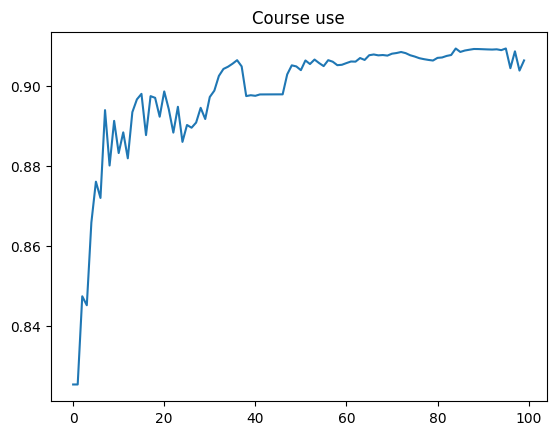

In [ ]:
population1 = population(20)
graph = []

for i in range(100):
  best = gbest(population1)
  newPop = []
  for j in population1:
    new_part = new_particle(j,population1)
    newPop.append(new_part)
  population1 = newPop
  graph.append(evaluate_simple(best))

  print(f'Best solution of the population: {best}')
  print(f'Fitness value of the solution: {evaluate_simple(best)}')
  print(sum(best))
  print()


plt.plot(graph)
plt.title('Course use')
plt.show()

